# Spark Word Count Example

## Getting the source file

The first step is to download a large text file from [here](https://norvig.com/big.txt)

In [1]:
! wget https://norvig.com/big.txt

--2020-05-25 09:43:09--  https://norvig.com/big.txt


Resolving norvig.com (norvig.com)... 158.106.138.13


Connecting to norvig.com (norvig.com)|158.106.138.13|:443... connected.


HTTP request sent, awaiting response... 200 OK


Length: 6488666 (6.2M) [text/plain]


Saving to: 'big.txt.3'







big.txt.3             0%[                    ]       0  --.-KB/s               

big.txt.3             0%[                    ]   9.34K  32.1KB/s               

big.txt.3             0%[                    ]  39.97K  72.2KB/s               

big.txt.3             1%[                    ]  87.97K   116KB/s               

big.txt.3             3%[                    ] 199.97K   191KB/s               

big.txt.3             4%[                    ] 303.97K   243KB/s               

big.txt.3             5%[>                   ] 367.97K   250KB/s               

big.txt.3             6%[>                   ] 415.97K   246KB/s               

big.txt.3             6%[>                   ] 431.97

Make sure the files exists. Also, how many lines it has?

In [2]:
! ls -l ./big.txt
! wc -l ./big.txt

-rwxr-xr-x 1 root root 6488666 Apr 22  2019 ./big.txt

128457 ./big.txt



## Preparing HDFS

Do the followings in HDFS:

* Remove any folder/files in `/tmp` that starts with `wc_`,

* Create folder `/tmp/wc_in/`,

* Put the text file into `/tmp/wc_in/`,

* Make sure put was successfull (it should have the same size as the local file)!

In [3]:
! hadoop fs -rm    -r  /tmp/wc_*
! hadoop fs -mkdir -p  /tmp/wc_in
! hadoop fs -put   -p  big.txt             /tmp/wc_in/
! hadoop fs -ls        /tmp/wc_in/big.txt

rm: `/tmp/wc_*': No such file or directory


-rwxr-xr-x   1 root root    6488666 2019-04-22 17:44 /tmp/wc_in/big.txt




In [4]:
! hadoop fs -chmod -R 777 /tmp
! hadoop fs -ls        /tmp/wc_in/big.txt

-rwxrwxrwx   1 root root    6488666 2019-04-22 17:44 /tmp/wc_in/big.txt




Let's see how we can access our HDFS.

In [5]:
! hdfs getconf -confKey fs.defaultFS

hdfs://localhost:9000




## Counting Words

At this point there is no Spark Web UI. Let's run a dummy command to create one at [http://localhost:4040](http://localhost:4040)

In [6]:
sc

Intitializing Scala interpreter ...

Spark Web UI available at http://017c451ec51c:4040
SparkContext available as 'sc' (version = 2.4.5, master = local[*], app id = local-1590400270819)
SparkSession available as 'spark'


res0: org.apache.spark.SparkContext = org.apache.spark.SparkContext@754105a5


Great! Now we have:

* **Spark Web UI** at [http://localhost:4040](http://localhost:4040), 

* **Spark Context** as `sc`, and 

* **Spark Session** as `spark`.

Let's write a very nondescriptive word count pipeline using Spark!

In [7]:
sc.textFile("hdfs://localhost:9000/tmp/wc_in/big.txt")  // reads the text file from HDFS
    .flatMap(line => line.split(" "))                   // splits each line to its words
    .map(word => (word, 1))                             // maps each word to (word,1 ) tuple
    .reduceByKey(_ + _)                                 // reduces the tuples
    .saveAsTextFile("hdfs://localhost:9000/tmp/wc_out") // saves the results into HDFS

We should be able to see something like:

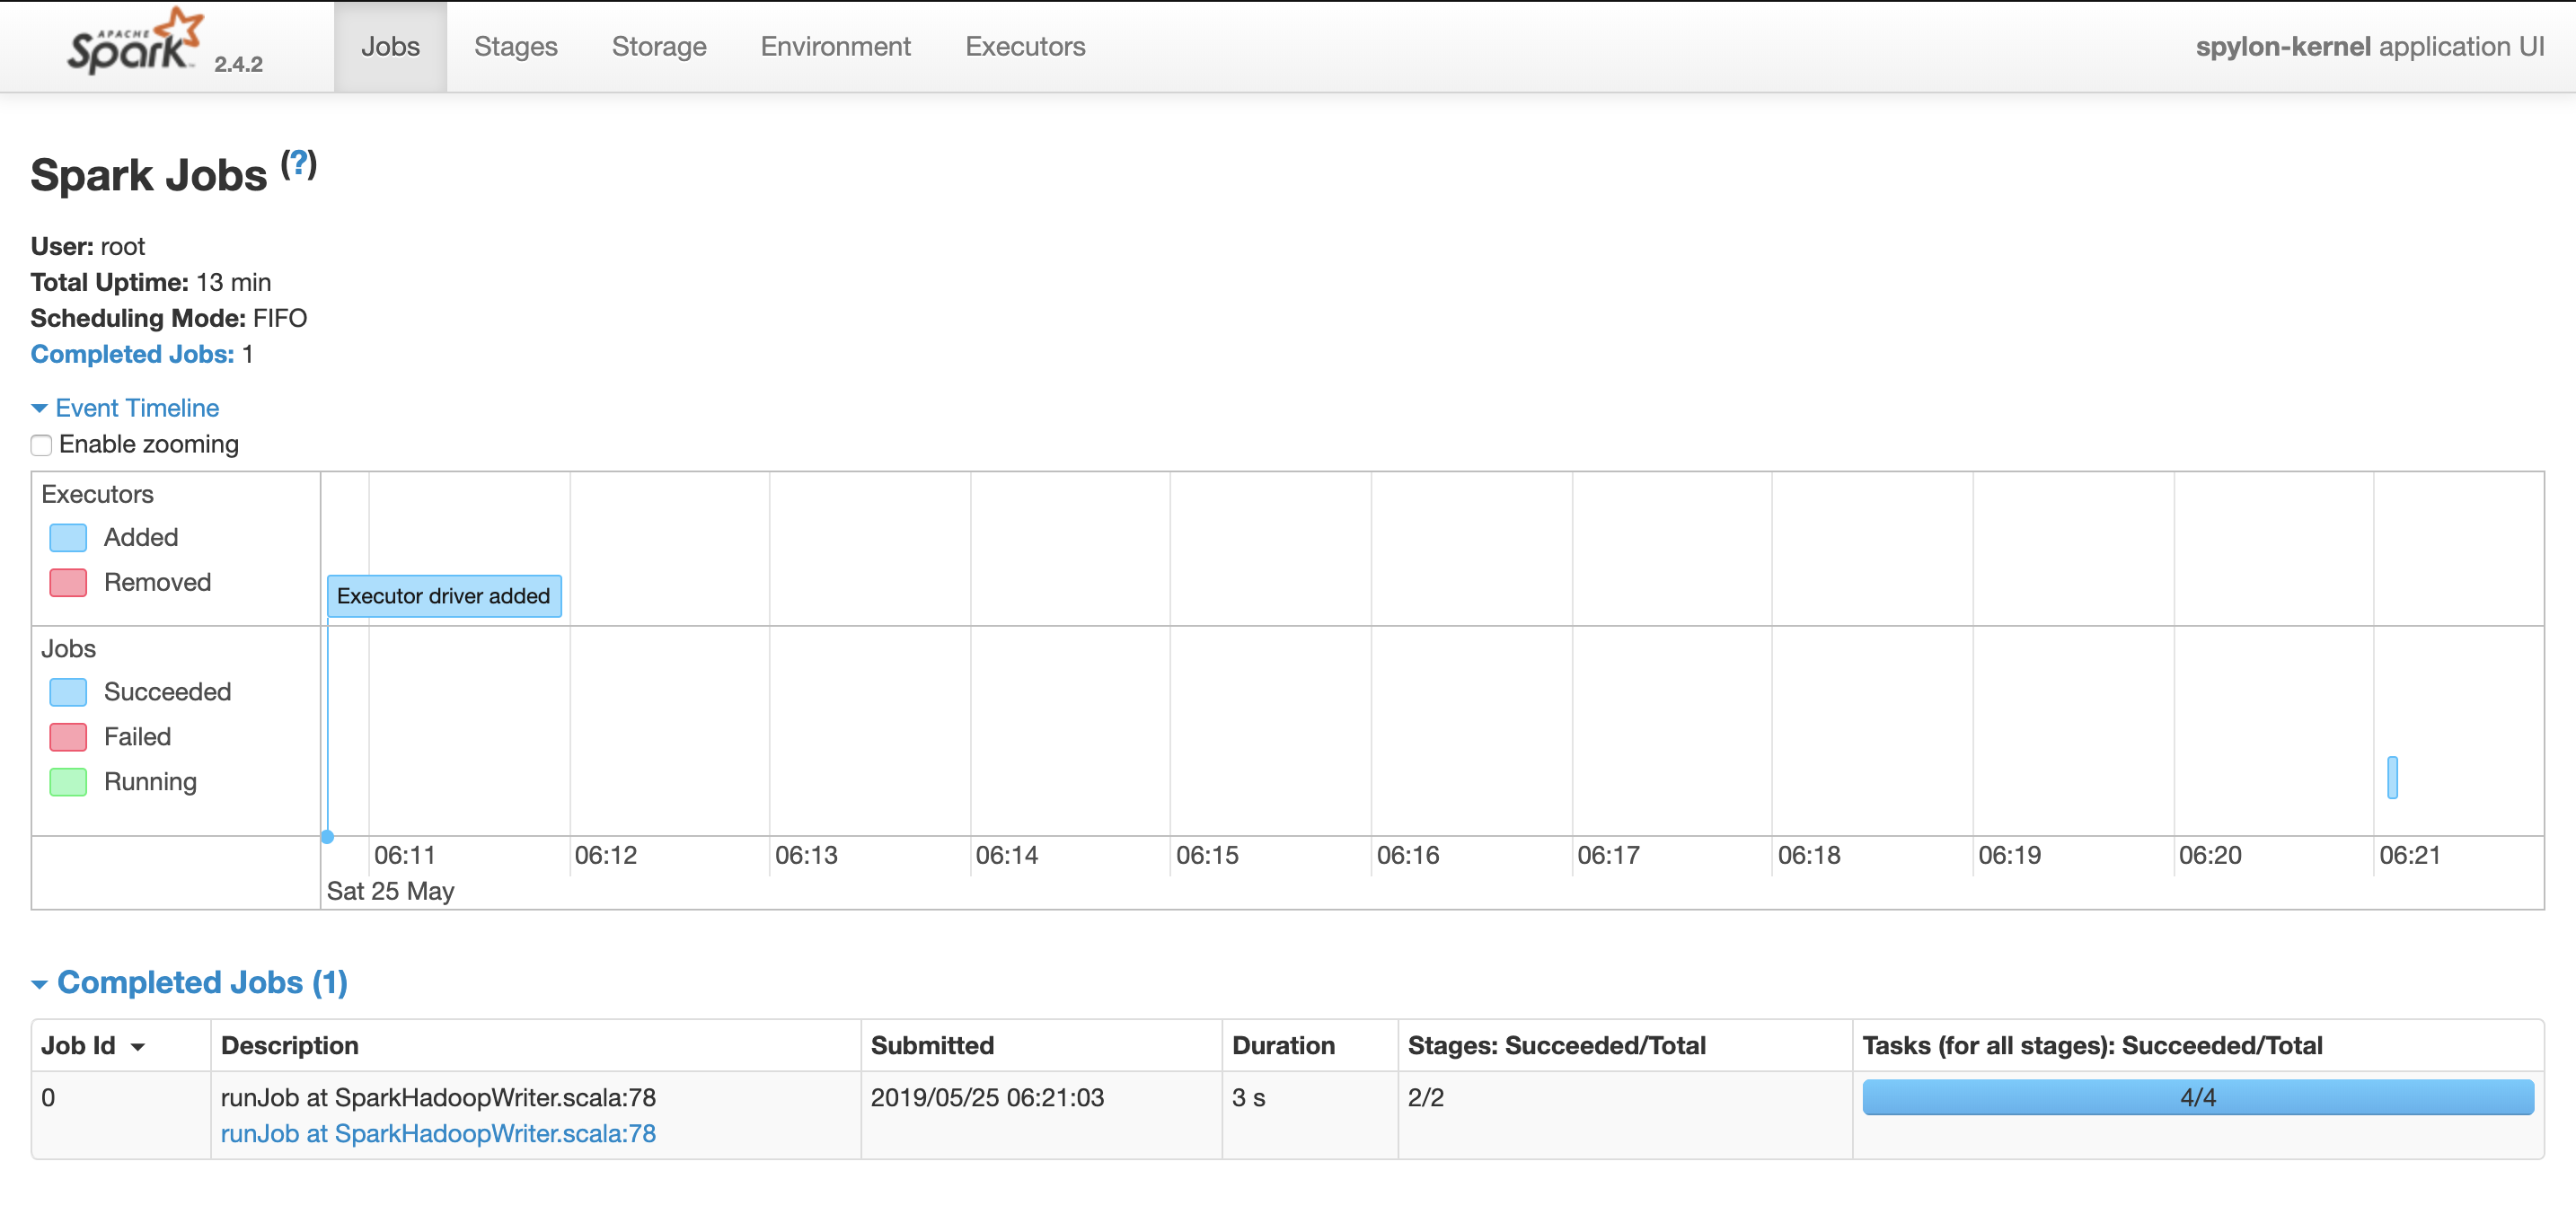

Let's see what is the outcome of our word count.

In [8]:
!hadoop fs -ls /tmp/wc_out/

Found 3 items


-rw-r--r--   3 root supergroup          0 2020-05-25 09:55 /tmp/wc_out/_SUCCESS


-rw-r--r--   3 root supergroup     546345 2020-05-25 09:55 /tmp/wc_out/part-00000


-rw-r--r--   3 root supergroup     553570 2020-05-25 09:55 /tmp/wc_out/part-00001




Cool! `/tmp/wc_out/_SUCCESS` means we made it! It seems we had two reducers. Let's take a quick look at one of them.

In [9]:
!hadoop fs -tail /tmp/wc_out/part-00000

.,1)


(field.",1)


(Abbe,3)


(Kobelnitz,,1)


(thoughts,,19)


(commits,2)


(conciliatory,,1)


(session,,4)


(settlement;,1)


((447-448,,1)


(coercion,2)


(oppressors,1)


(groups,53)


(magnanimity,11)


(Austin,1)


(Disorder.=--While,1)


(gapes,,1)


(1901;,1)


(336,2)


(revolutions,,3)


(assistance.",2)


(continues,20)


(terence,1)


(searching,31)


(gray-blue,1)


(paused,35)


(generous,,1)


(Moscow--despite,1)


(Assistance,4)


(defeated.,3)


(faster!",1)


(Awkwardly,1)


(Denisov,211)


(matter?,5)


(lesser,23)


(inconsequential,1)


('You,27)


(received;,1)


(Sculler's,1)


(Lymph,5)


(666.,2)


(clamped,4)


(Pyaemia,,1)


(goatskin,1)


(chinks,1)


(matters:,1)


(understand,285)


(fellow--your,1)


(maggie,1)


('ST.,1)


(Personal,3)


(kindness!",1)


(Krasnaya,2)


(Webster,12)


(autonomy.,1)


(Omental,1)


(sound!",1)


(disinclination,1)


(innocence.",1)


(scratching,7)


(memorable,21)


(left!...,1)


(Moroseyka,,2)


(indicated--that,1

Our job is done here! See you next time.